## Data processing with Swan
The following section was already run so you don't have to wait for results, but you're welcome to give it a try!

In [ ]:
# data download
!wget http://crick.bio.uci.edu/freese/210830_ucd_workshop/data.tgz
!tar -xf data.tgz

In [1]:
import swan_vis as swan

In [2]:
# construct SwanGraph
annot_gtf = 'ref/gencode.vM21.annotation.gtf'
data_gtf = 'data/all_talon_observedOnly.gtf'
ab_file = 'data/all_talon_abundance_filtered.tsv'
meta = 'data/metadata.tsv'

In [6]:
sg = swan.SwanGraph()
sg.add_annotation(annot_gtf)
sg.add_transcriptome(data_gtf)
sg.add_abundance(ab_file)
sg.add_metadata(meta)

In [5]:
sg.save_graph('swan')

Saving graph as swan.p


In [4]:
# compare 0 and 72 hr time point 
obs_col = 'time_point'
obs_conditions = ['0hr', '72hr']
_ = sg.de_gene_test(obs_col, obs_conditions=obs_conditions)
_ = sg.de_transcript_test(obs_col, obs_conditions=obs_conditions)
_ = sg.die_gene_test(obs_col, obs_conditions=obs_conditions)
test = sg.die_gene_test(kind='tss', obs_col=obs_col, obs_conditions=obs_conditions)
test = sg.die_gene_test(kind='tes', obs_col=obs_col, obs_conditions=obs_conditions)

In [ ]:
# find novel exon-skipping and intron retention events
_ = sg.find_es_genes()
_ = sg.find_ir_genes()

In [5]:
# save graph again so we have access to all the results 
sg.save_graph('swan')

Saving graph as swan.p


## Figures generated using bulk C2C12 data for the presentation

In [35]:
import swan_vis as swan
import scanpy as sc

In [42]:
sg = swan.read('swan.p')

Read in graph from swan.p


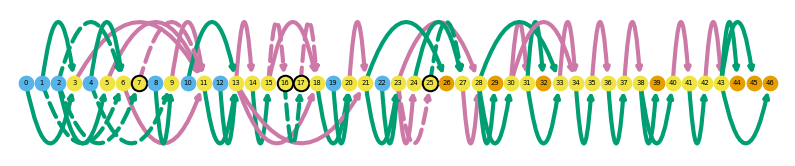

In [43]:
sg.plot_graph('Tfdp1', indicate_novel=True)

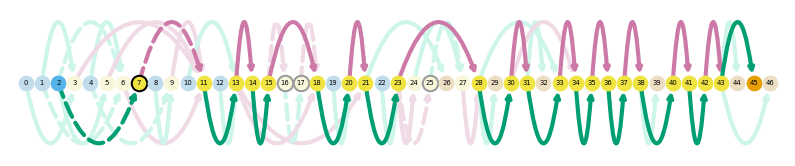

In [44]:
sg.plot_transcript_path('TALONT000169332', indicate_novel=True)

... storing 'cell_line' as categorical
... storing 'time_point' as categorical
... storing 'gname' as categorical


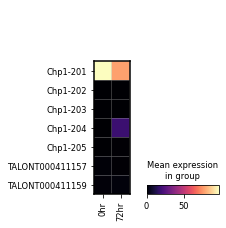

In [45]:
sg.gen_report('Chp1',
              'figures/chp1',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)

sg.gen_report('Chp1',
              'figures/chp1',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)

sg.adata.var = sg.adata.var.merge(sg.t_df[['gname', 'tname']], left_index=True, right_index=True, how='left')
var_names = sg.adata.var.loc[sg.adata.var.gname == 'Chp1', 'tname'].tolist()
sc.pl.matrixplot(sg.adata, var_names,
                 gene_symbols='tname',
                 groupby='time_point', layer='pi',
                 cmap='magma', swap_axes=True)

... storing 'cell_line' as categorical
... storing 'time_point' as categorical
... storing 'gid' as categorical
... storing 'gname' as categorical
... storing 'tss_name' as categorical


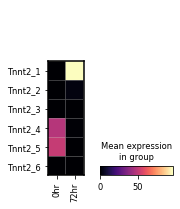

In [46]:
sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)

sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)

var_names = sg.tss_adata.var.loc[sg.tss_adata.var.gname == 'Tnnt2', 'tss_name'].tolist()
sc.pl.matrixplot(sg.tss_adata, var_names,
                 gene_symbols='tss_name',
                 groupby='time_point', layer='pi',
                 cmap='magma', swap_axes=True)

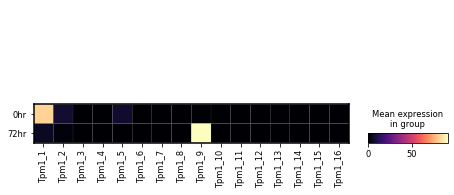

In [48]:
sg.gen_report('Tpm1',
              'figures/tpm1',
              metadata_cols=['time_point'],
              groupby='time_point', 
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)

sg.gen_report('Tpm1',
              'figures/tpm1',
              metadata_cols=['time_point'],
              groupby='time_point', 
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)

var_names = sg.tes_adata.var.loc[sg.tes_adata.var.gname == 'Tpm1', 'tes_name'].tolist()
sc.pl.matrixplot(sg.tes_adata, var_names,
                 gene_symbols='tes_name',
                 groupby='time_point', layer='pi',
                 cmap='magma')

## Your turn!

### Install Swan

Run the block below to install from GitHub directly

In [ ]:
!git clone git@github.com:mortazavilab/swan_vis.git
!cd swan_vis
!pip install .

Alternatively, install from PyPi (this will be exactly the same!)

In [ ]:
!pip install swan_vis

Now we'll take a look at some of the results from Swan and make some cool plots. Please check out the [documentation](https://freese.gitbook.io/swan/) to get a better idea of the stuff you can do!

In [ ]:
# download the SwanGraph
!wget http://crick.bio.uci.edu/freese/210830_ucd_workshop/swan.p
    
# create a figures directory because there will be a lot of output figures!
!mkdir figures

In [2]:
# import swan
import swan_vis as swan

In [2]:
# load the SwanGraph
sg = swan.read('swan.p')

Read in graph from swan.p


### What genes contain novel exon skipping events?

We can query the SwanGraph object for a table of exon skipping events. Here, we'll do just that as well as visualize the exon skipping events in a few genes.

In [20]:
# get table of exon skipping events
es = sg.adata.uns['es']

# add gene names, which I should make automatic in a future update!
gnames = sg.t_df[['gid', 'gname']]
print(len(es.index))
es = es.merge(gnames, on='gid', how='left')
es = es.drop_duplicates()
es.head()

1303


,gid,tid,egde_id,gname
0,SIRV3.1,SIRV3.1-SIRV301,741285,SIRV3.1
7,SIRV3.1,SIRV3.1-SIRV303,741285,SIRV3.1
14,SIRV5.1,SIRV5.1-SIRV505,741375,SIRV5.1
24,SIRV5.1,SIRV5.1-SIRV510,741375,SIRV5.1
34,SIRV6.1,SIRV6.1-SIRV601,741415,SIRV6.1


In [21]:
# unique genes
es_genes = es.gname.unique().tolist()
print(len(es_genes))
es_genes[5:10]

518


['Col3a1', 'Bzw1', 'Creb1', 'Ttll4', 'Stk16']

Let's plot a few of these genes that have exon skipping events.

In [58]:
es.loc[es.gname == 'Srsf4'] # Srsf4 is a splicing factor!

,gid,tid,egde_id,gname
9450,ENSMUSG00000028911.16,TALONT000495077,732856,Srsf4


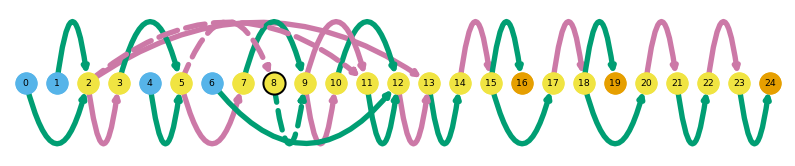

In [59]:
sg.plot_graph('Srsf4', indicate_novel=True)

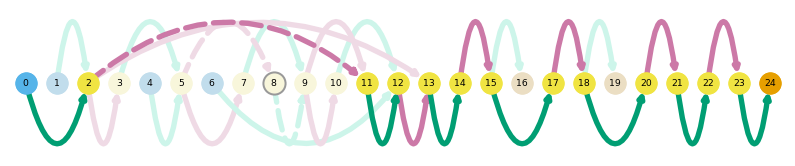

In [60]:
sg.plot_transcript_path('TALONT000495077', indicate_novel=True)

In [63]:
es.loc[es.gname == 'Tnnt3']

,gid,tid,egde_id,gname
12557,ENSMUSG00000061723.18,TALONT000560315,734894,Tnnt3


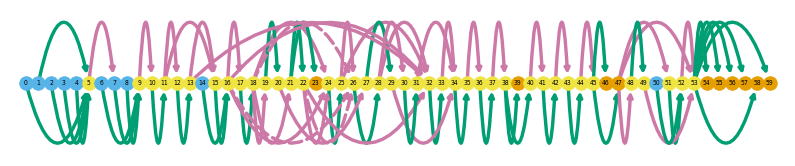

In [62]:
sg.plot_graph('Tnnt3', indicate_novel=True)

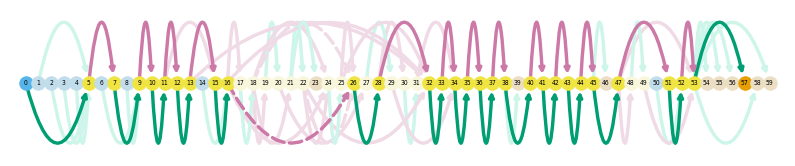

In [64]:
sg.plot_transcript_path('TALONT000560315', indicate_novel=True)

In [65]:
es.loc[es.gname == 'Vim']

,gid,tid,egde_id,gname
7589,ENSMUSG00000026728.9,TALONT000162980,731211,Vim


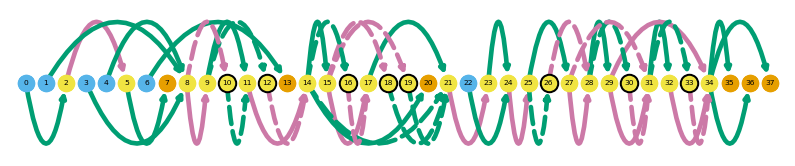

In [66]:
sg.plot_graph('Vim', indicate_novel=True)

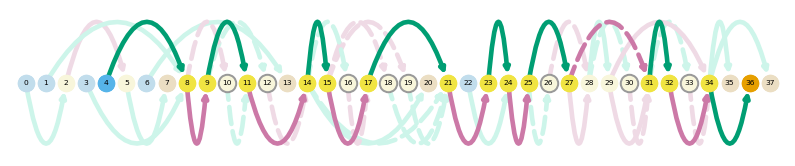

In [67]:
sg.plot_transcript_path('TALONT000162980', indicate_novel=True)

### What genes contain novel intron retention events?

We'll do the same thing for genes with novel intron retention events. We'll pull them from the SwanGraph and plot a few examples.

In [195]:
# get table of intron retention events
ir = sg.adata.uns['ir']

# add gene names, which I should make automatic in a future update!
gnames = sg.t_df[['gid', 'gname']]
print(len(ir.index))
ir = ir.merge(gnames, on='gid', how='left')
ir = ir.drop_duplicates()
ir.head()

215


,gid,tid,egde_id,gname
0,SIRV2.2,SIRV2.2-SIRV206,741283,SIRV2.2
1,SIRV3.1,SIRV3.1-SIRV302,741299,SIRV3.1
8,SIRV3.1,SIRV3.1-SIRV303,741299,SIRV3.1
15,SIRV5.1,SIRV5.1-SIRV506,741388,SIRV5.1
25,SIRV5.1,SIRV5.1-SIRV511,741388,SIRV5.1


In [196]:
# unique genes
ir_genes = ir.gname.unique().tolist()
print(len(ir_genes))
ir_genes[4]

117


'Plekhb2'

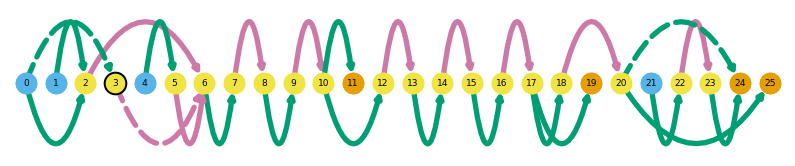

In [104]:
sg.plot_graph('Plekhb2', indicate_novel=True)

In [101]:
ir.loc[ir.gname == 'Plekhb2']

,gid,tid,egde_id,gname
189,ENSMUSG00000001436.15,TALONT000218169,736549,Slc19a1
204,ENSMUSG00000001436.15,TALONT000218202,736549,Slc19a1


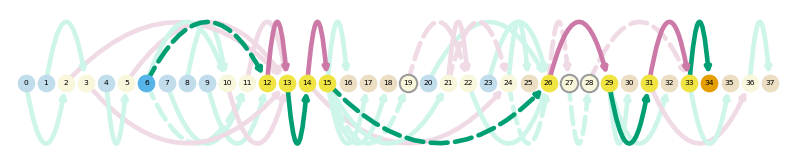

In [107]:
sg.plot_transcript_path('TALONT000218169', indicate_novel=True)

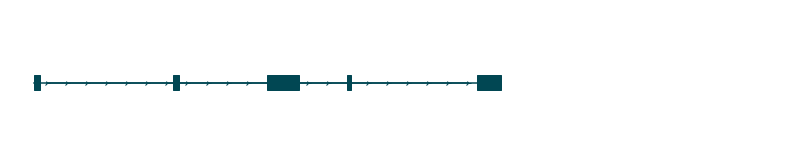

In [112]:
sg.plot_transcript_path('TALONT000218169', browser=True)

In [108]:
ir_genes[10:15]

['Ptbp1', 'Oaz1', 'Apba3', 'TALONG000074151', 'Txnrd1']

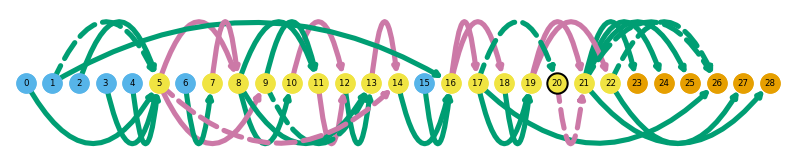

In [111]:
sg.plot_graph('Oaz1', indicate_novel=True)

In [124]:
ir.loc[ir.gname == 'Oaz1']

,gid,tid,egde_id,gname
317,ENSMUSG00000035242.15,TALONT000269069,736630,Oaz1


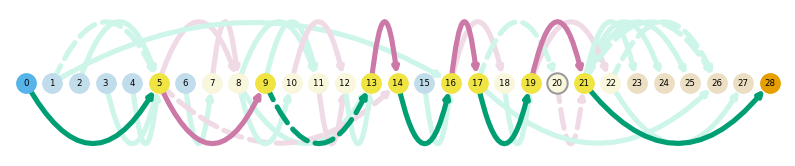

In [125]:
sg.plot_transcript_path('TALONT000269069', indicate_novel=True)

### What genes are differentially-expressed between myotubes and myoblasts?

Now we'll take a look at some of the results of statistical tests run between the myoblast and myotube conditions. We can access the differentially-expressed genes in the SwanGraph and provide q value and log fold change thresholds. Here we'll use q < 0.05 and log2fc > 1.

In [6]:
obs_col = 'time_point'
obs_conditions = ['0hr', '72hr']

In [7]:
de_genes = sg.get_de_genes(obs_col, obs_conditions=obs_conditions,
                           q=0.05, log2fc=1)

In [8]:
de_genes.head()

,gid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gname
19866,ENSMUSG00000070733.13,0.0,0.0,283.913085,0.561909,False,0.500002,283.913085,2.222759e-162,-16.217098,Fryl
18848,ENSMUSG00000065852.1,0.0,0.0,283.913085,0.407021,False,0.500000,283.913085,2.222759e-162,-15.435992,Gm22353
18852,ENSMUSG00000065862.1,0.0,0.0,283.913085,0.407021,False,0.500000,283.913085,2.222759e-162,-15.435992,Gm24029
19949,ENSMUSG00000071042.12,0.0,0.0,283.913085,0.203510,False,0.409290,283.913085,2.222759e-162,-11.215066,Rasgrp3
7466,ENSMUSG00000029699.13,0.0,0.0,283.913085,0.578117,False,1.000000,283.913085,2.222759e-162,-28.840319,Ssc4d


In [9]:
# look for myo-related genes (which are often implicated in the myogenic process)
de_genes.loc[de_genes.gname.str.contains('Myo')].head()

,gid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gname
19415,ENSMUSG00000068697.7,0.0,0.0,283.913085,4.689763,False,1.000000,283.913085,2.222759e-162,-38.567663,Myoz1
6503,ENSMUSG00000028116.13,0.0,0.0,283.913085,28.415941,False,0.999999,283.913085,2.222759e-162,-45.865588,Myoz2
20253,ENSMUSG00000072720.9,0.0,0.0,283.913085,5.471390,False,1.000000,283.913085,2.222759e-162,-39.200583,Myo18b
10601,ENSMUSG00000037139.15,0.0,0.0,283.913085,16.414171,False,0.999999,283.913085,2.222759e-162,-43.658559,Myom3
8369,ENSMUSG00000031461.4,0.0,0.0,283.913085,351.204727,False,0.999999,283.913085,2.222759e-162,-55.932105,Myom2


In [10]:
# number of differentially-expressed genes
len(de_genes.index)

5392

### What transcripts are differentially-expressed between myoblasts and myotubes?

Now we'll take a look at transcripts that are differentially-expressed between the time points. These can be accessed much in the same way that the differentially-expressed genes can be. We'll also make a gene report showing the differentially-expressed transcript isoforms in one gene, _Myo6_.

In [161]:
# results from differential transcript expression test
de_transcripts = sg.get_de_transcripts(obs_col, obs_conditions=obs_conditions,
                           q=0.05, log2fc=1)

In [162]:
de_transcripts.head()

,tid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gid,gname
90372,ENSMUST00000184224.1,0.0,0.0,283.913085,0.187303,False,0.374605,283.913085,2.222759e-162,-10.301695,ENSMUSG00000098716.1,Gm28033
90689,ENSMUST00000184591.1,0.0,0.0,283.913085,2.312467,False,0.999999,283.913085,2.222759e-162,-35.526327,ENSMUSG00000033182.12,Kbtbd12
90287,ENSMUST00000184135.1,0.0,0.0,283.913085,0.203510,False,0.409290,283.913085,2.222759e-162,-11.215066,ENSMUSG00000098761.1,Gm18821
16680,ENSMUST00000079773.13,0.0,0.0,283.913085,13.458757,False,0.999999,283.913085,2.222759e-162,-42.859372,ENSMUSG00000003345.16,Csnk1g2
45913,ENSMUST00000132080.1,0.0,0.0,283.913085,0.187303,False,0.374605,283.913085,2.222759e-162,-10.301695,ENSMUSG00000013858.14,Tmem259


In [163]:
# look for myo-related transcripts (which are often implicated in the myogenic process)
de_transcripts.loc[de_transcripts.gname.str.contains('Myo')].head()

,tid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gid,gname
89607,ENSMUST00000183377.1,0.0,0.0,283.913085,0.203510,False,0.409290,283.913085,2.222759e-162,-11.215066,ENSMUSG00000033577.18,Myo6
49005,ENSMUST00000135375.3,0.0,0.0,283.913085,1.563254,False,1.000001,283.913085,2.222759e-162,-33.923097,ENSMUSG00000000631.20,Myo18a
86409,ENSMUST00000179759.2,0.0,0.0,283.913085,20.477194,False,0.999999,283.913085,2.222759e-162,-44.551066,ENSMUSG00000024049.15,Myom1
45155,ENSMUST00000131251.1,0.0,0.0,283.913085,0.390814,False,0.781626,283.913085,2.222759e-162,-21.519703,ENSMUSG00000031461.4,Myom2
58333,ENSMUST00000145304.7,0.0,0.0,283.913085,10.364664,False,1.000000,283.913085,2.222759e-162,-41.799408,ENSMUSG00000037139.15,Myom3


In [165]:
# look for Pkm, which has isoforms with important differences in expression
# profile across myogenesis
print(de_transcripts.loc[de_transcripts.gname == 'Pkm'])

# same with Tpm2
print(de_transcripts.loc[de_transcripts.gname == 'Tpm2'])

                    tid      pval      qval      log2fc       mean  zero_mean  \
146970  TALONT000524508  0.000000  0.000000  283.913085   4.502460      False   
146957  TALONT000523760  0.000002  0.000020    2.987293  13.641756      False   
146953  TALONT000523686  0.006228  0.042511    2.183307   4.312392      False   
146951  TALONT000523682  0.000022  0.000176    1.360462  14.967567      False   

            grad    coef_mle        coef_sd         ll                    gid  \
146970  0.999999  283.913085  2.222759e-162 -38.394349  ENSMUSG00000032294.17   
146957  0.352200    2.987293   6.332595e-01  -4.011946  ENSMUSG00000032294.17   
146953  0.000038    2.183307   7.981339e-01  -6.115639  ENSMUSG00000032294.17   
146951  1.263405    1.360462   3.206211e-01   0.000000  ENSMUSG00000032294.17   

       gname  
146970   Pkm  
146957   Pkm  
146953   Pkm  
146951   Pkm  
                         tid      pval      qval      log2fc        mean  \
145514       TALONT000415087  0.00000

In [166]:
# how many differentially-expressed transcripts are there?
len(de_transcripts.index)

12232

We can use different colors to represent the two different time points in the dataset. Change them if you'd like! You can either use hex codes or [named matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html). 

In [ ]:
# add some colors to represent the 2 different time points
green = '#019f73'
pink = '#cb79a7'
cmap = {'0hr': pink, '72hr': green}
sg.set_metadata_colors('time_point', cmap)

In [167]:
# make a plot showing significantly differentially expressed Myo6 isoforms
sg.gen_report('Myo6',
              'figures/myo6',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True, 
              include_qvals=True,
              qval_obs_col='time_point',
              qval_obs_conditions=['0hr', '72hr'])


Plotting transcripts for ENSMUSG00000033577.18
Saving transcript path graph for TALONT000562244 as figures/myo6_TALONT000562244_path.png
Saving transcript path graph for ENSMUST00000138650.2 as figures/myo6_ENSMUST00000138650.2_path.png
Saving transcript path graph for ENSMUST00000035889.14 as figures/myo6_ENSMUST00000035889.14_path.png
Saving transcript path graph for ENSMUST00000113266.7 as figures/myo6_ENSMUST00000113266.7_path.png
Saving transcript path graph for ENSMUST00000183377.1 as figures/myo6_ENSMUST00000183377.1_path.png
Generating report for ENSMUSG00000033577.18


### What genes exhibit isoform switching between myoblasts and myotubes?

This is the most interesting stuff in my opinion. We can find genes that exhibit isoform switching (also called differential isoform expression, or DIE). These genes are characterized by a change in frequency of use of different constituent isoforms across the two conditions. The signficance thresholds for this test can be modulated by choosing a maximum p value threshold as well as a minimum change in percent isoform expression value, which is indicative of how substantial the isoform change is. Hopefully this will be better explained by making some figures though!

In [181]:
# results from differential transcript expression test
die_genes = sg.get_die_genes(obs_col=obs_col, obs_conditions=obs_conditions,
                             p=0.05, dpi=10)

In [182]:
die_genes.head()

,gid,p_val,dpi,adj_p_val
3,ENSMUSG00000061689.15,1.443605e-19,67.565826,3.424032e-18
5,ENSMUSG00000020152.7,6.042619e-11,19.780212,8.726454e-10
11,ENSMUSG00000000326.13,9.814141e-04,28.234030,5.577975e-03
17,ENSMUSG00000000420.15,1.257904e-29,37.495850,4.475362e-28
18,ENSMUSG00000000440.12,9.107806e-03,44.185776,4.001738e-02


In [184]:
# add gene names, which I should make automatic in future releases!
gnames = sg.t_df[['gname', 'gid']].drop_duplicates()
die_genes = die_genes.merge(gnames, on='gid', how='left')

In [185]:
die_genes = die_genes.sort_values(by='dpi', ascending=False)
die_genes.head()

,gid,p_val,dpi,adj_p_val,gname
281,ENSMUSG00000026414.13,5.312136e-237,98.948153,2.645927e-234,Tnnt2
161,ENSMUSG00000020836.15,1.787333e-64,97.932594,1.718034e-62,Coro6
151,ENSMUSG00000020439.17,5.141485e-75,97.710327,5.523568e-73,Smtn
946,ENSMUSG00000039542.16,7.076545e-128,96.704330,1.436015e-125,Ncam1
496,ENSMUSG00000036918.16,3.520068e-06,95.447243,3.115743e-05,Ttc7


Plotting some isoform-switching genes:

In [186]:
die_genes.loc[die_genes.gname == 'Dlgap4']

,gid,p_val,dpi,adj_p_val,gname
0,ENSMUSG00000061689.15,1.443605e-19,67.565826,3.424032e-18,Dlgap4


In [35]:
sg.gen_report('Dlgap4',
              'figures/dlgap4',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True, 
              browser=True)


Plotting transcripts for ENSMUSG00000061689.15
Saving transcript path graph for ENSMUST00000109566.8 as figures/dlgap4_browser_ENSMUST00000109566.8_path.png
Saving transcript path graph for ENSMUST00000099145.5 as figures/dlgap4_browser_ENSMUST00000099145.5_path.png
Saving transcript path graph for ENSMUST00000127944.8 as figures/dlgap4_browser_ENSMUST00000127944.8_path.png
Saving transcript path graph for ENSMUST00000131157.8 as figures/dlgap4_browser_ENSMUST00000131157.8_path.png
Generating report for ENSMUSG00000061689.15


In [36]:
sg.gen_report('Dlgap4',
              'figures/dlgap4',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True, 
              layer='pi',
              display_numbers=True)


Plotting transcripts for ENSMUSG00000061689.15
Saving transcript path graph for ENSMUST00000109566.8 as figures/dlgap4_ENSMUST00000109566.8_path.png
Saving transcript path graph for ENSMUST00000099145.5 as figures/dlgap4_ENSMUST00000099145.5_path.png
Saving transcript path graph for ENSMUST00000127944.8 as figures/dlgap4_ENSMUST00000127944.8_path.png
Saving transcript path graph for ENSMUST00000131157.8 as figures/dlgap4_ENSMUST00000131157.8_path.png
Generating report for ENSMUSG00000061689.15


In [187]:
die_genes.loc[die_genes.gname == 'Tnnt2']

,gid,p_val,dpi,adj_p_val,gname
281,ENSMUSG00000026414.13,5.312136e-237,98.948153,2.645927e-234,Tnnt2


In [40]:
sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000026414.13
Saving transcript path graph for TALONT000394811 as figures/tnnt2_novel_TALONT000394811_path.png
Saving transcript path graph for TALONT000394812 as figures/tnnt2_novel_TALONT000394812_path.png
Saving transcript path graph for TALONT000396016 as figures/tnnt2_novel_TALONT000396016_path.png
Saving transcript path graph for TALONT000396098 as figures/tnnt2_novel_TALONT000396098_path.png
Saving transcript path graph for TALONT000394818 as figures/tnnt2_novel_TALONT000394818_path.png
Saving transcript path graph for TALONT000394815 as figures/tnnt2_novel_TALONT000394815_path.png
Saving transcript path graph for TALONT000394848 as figures/tnnt2_novel_TALONT000394848_path.png
Saving transcript path graph for TALONT000394894 as figures/tnnt2_novel_TALONT000394894_path.png
Saving transcript path graph for ENSMUST00000191055.1 as figures/tnnt2_novel_ENSMUST00000191055.1_path.png
Saving transcript path graph for TALONT000394893 as figures/tnnt2_nov

In [41]:
sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              layer='pi',
              display_numbers=True,
              novelty=True, 
              browser=True)


Plotting transcripts for ENSMUSG00000026414.13
Saving transcript path graph for TALONT000394811 as figures/tnnt2_browser_TALONT000394811_path.png
Saving transcript path graph for TALONT000394812 as figures/tnnt2_browser_TALONT000394812_path.png
Saving transcript path graph for TALONT000396016 as figures/tnnt2_browser_TALONT000396016_path.png
Saving transcript path graph for TALONT000396098 as figures/tnnt2_browser_TALONT000396098_path.png
Saving transcript path graph for TALONT000394818 as figures/tnnt2_browser_TALONT000394818_path.png
Saving transcript path graph for TALONT000394815 as figures/tnnt2_browser_TALONT000394815_path.png
Saving transcript path graph for TALONT000394848 as figures/tnnt2_browser_TALONT000394848_path.png
Saving transcript path graph for TALONT000394894 as figures/tnnt2_browser_TALONT000394894_path.png
Saving transcript path graph for ENSMUST00000191055.1 as figures/tnnt2_browser_ENSMUST00000191055.1_path.png
Saving transcript path graph for TALONT000394893 as

In [188]:
die_genes.loc[die_genes.gname == 'Coro6']

,gid,p_val,dpi,adj_p_val,gname
161,ENSMUSG00000020836.15,1.787333e-64,97.932594,1.718034e-62,Coro6


In [43]:
sg.gen_report('Coro6',
              'figures/coro6',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000020836.15
Saving transcript path graph for TALONT000544061 as figures/coro6_novel_TALONT000544061_path.png
Saving transcript path graph for ENSMUST00000102493.7 as figures/coro6_novel_ENSMUST00000102493.7_path.png
Saving transcript path graph for TALONT000544046 as figures/coro6_novel_TALONT000544046_path.png
Saving transcript path graph for TALONT000544055 as figures/coro6_novel_TALONT000544055_path.png
Saving transcript path graph for TALONT000544048 as figures/coro6_novel_TALONT000544048_path.png
Saving transcript path graph for TALONT000544058 as figures/coro6_novel_TALONT000544058_path.png
Saving transcript path graph for TALONT000544052 as figures/coro6_novel_TALONT000544052_path.png
Saving transcript path graph for ENSMUST00000108391.8 as figures/coro6_novel_ENSMUST00000108391.8_path.png
Generating report for ENSMUSG00000020836.15


In [44]:
sg.gen_report('Coro6',
              'figures/coro6',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True)


Plotting transcripts for ENSMUSG00000020836.15
Saving transcript path graph for TALONT000544061 as figures/coro6_browser_TALONT000544061_path.png
Saving transcript path graph for ENSMUST00000102493.7 as figures/coro6_browser_ENSMUST00000102493.7_path.png
Saving transcript path graph for TALONT000544046 as figures/coro6_browser_TALONT000544046_path.png
Saving transcript path graph for TALONT000544055 as figures/coro6_browser_TALONT000544055_path.png
Saving transcript path graph for TALONT000544048 as figures/coro6_browser_TALONT000544048_path.png
Saving transcript path graph for TALONT000544058 as figures/coro6_browser_TALONT000544058_path.png
Saving transcript path graph for TALONT000544052 as figures/coro6_browser_TALONT000544052_path.png
Saving transcript path graph for ENSMUST00000108391.8 as figures/coro6_browser_ENSMUST00000108391.8_path.png
Generating report for ENSMUSG00000020836.15


In [189]:
die_genes.loc[die_genes.gname == 'Smtn']

,gid,p_val,dpi,adj_p_val,gname
151,ENSMUSG00000020439.17,5.141485e-75,97.710327,5.523568e-73,Smtn


In [46]:
sg.gen_report('Smtn',
              'figures/smtn',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True)


Plotting transcripts for ENSMUSG00000020439.17
Saving transcript path graph for ENSMUST00000020721.14 as figures/smtn_browser_ENSMUST00000020721.14_path.png
Saving transcript path graph for ENSMUST00000020718.9 as figures/smtn_browser_ENSMUST00000020718.9_path.png
Saving transcript path graph for TALONT000451717 as figures/smtn_browser_TALONT000451717_path.png
Saving transcript path graph for TALONT000451783 as figures/smtn_browser_TALONT000451783_path.png
Saving transcript path graph for TALONT000451804 as figures/smtn_browser_TALONT000451804_path.png
Saving transcript path graph for ENSMUST00000170588.7 as figures/smtn_browser_ENSMUST00000170588.7_path.png
Generating report for ENSMUSG00000020439.17


In [190]:
die_genes.loc[die_genes.gname == 'Pkm']

,gid,p_val,dpi,adj_p_val,gname
428,ENSMUSG00000032294.17,0.0,54.352844,0.0,Pkm


In [41]:
sg.gen_report('Pkm',
              'figures/pkm',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True)


Plotting transcripts for ENSMUSG00000032294.17
Saving transcript path graph for ENSMUST00000034834.15 as figures/pkm_browser_ENSMUST00000034834.15_path.png
Saving transcript path graph for ENSMUST00000163694.3 as figures/pkm_browser_ENSMUST00000163694.3_path.png
Saving transcript path graph for TALONT000523649 as figures/pkm_browser_TALONT000523649_path.png
Saving transcript path graph for TALONT000523632 as figures/pkm_browser_TALONT000523632_path.png
Saving transcript path graph for TALONT000523613 as figures/pkm_browser_TALONT000523613_path.png
Saving transcript path graph for TALONT000523685 as figures/pkm_browser_TALONT000523685_path.png
Saving transcript path graph for TALONT000523682 as figures/pkm_browser_TALONT000523682_path.png
Saving transcript path graph for TALONT000524300 as figures/pkm_browser_TALONT000524300_path.png
Saving transcript path graph for TALONT000523760 as figures/pkm_browser_TALONT000523760_path.png
Saving transcript path graph for TALONT000523716 as figur

### More complex gene queries

Let's try to see if there are any genes that are interesting in more than one way. For instance, are there any isoform-switching genes that also have novel exon skipping events? We can check by taking the intersection of these gene sets, and we'll plot some of the results.

In [71]:
# get table of exon skipping events
es = sg.adata.uns['es']

# add gene names, which I should make automatic in a future update!
gnames = sg.t_df[['gid', 'gname']]
es = es.merge(gnames, on='gid', how='left')
es = es.drop_duplicates()
es_genes = es.gname.unique().tolist()
es_genes[5:10]

['Col3a1', 'Bzw1', 'Creb1', 'Ttll4', 'Stk16']

In [193]:
# get a table of isoform-switching genes
die = sg.get_die_genes(obs_col='time_point',
                        obs_conditions=['0hr', '72hr'],
                        p=0.05, dpi=10)

# add gene names, which I should make automatic in a future update!
gnames = sg.t_df[['gid', 'gname']].drop_duplicates()
die = die.merge(gnames, on='gid', how='left')
die = die.sort_values(by='dpi', ascending=False)
print(die.head())
die_genes = die.gname.unique().tolist()
print(len(die_genes))
die_genes[:5]

                       gid          p_val        dpi      adj_p_val  gname
281  ENSMUSG00000026414.13  5.312136e-237  98.948153  2.645927e-234  Tnnt2
161  ENSMUSG00000020836.15   1.787333e-64  97.932594   1.718034e-62  Coro6
151  ENSMUSG00000020439.17   5.141485e-75  97.710327   5.523568e-73   Smtn
946  ENSMUSG00000039542.16  7.076545e-128  96.704330  1.436015e-125  Ncam1
496  ENSMUSG00000036918.16   3.520068e-06  95.447243   3.115743e-05   Ttc7
987


['Tnnt2', 'Coro6', 'Smtn', 'Ncam1', 'Ttc7']

In [194]:
# get the intersection of novel exon skipping genes and isoform switching genes
genes = list(set(die_genes)&set(es_genes))
genes[:10]

['Tfdp1',
 'Slc12a7',
 'Bnip2',
 'Tmem87b',
 'Ap1s2',
 'Klc1',
 'Chp1',
 'Tbcd',
 'Bves',
 'Lhfpl2']

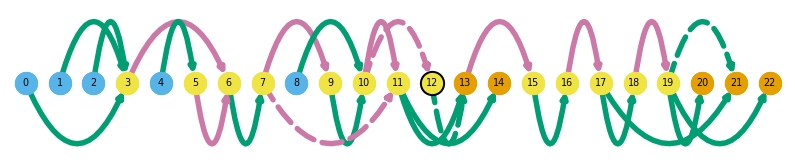

In [130]:
sg.plot_graph('Chp1', indicate_novel=True)

In [133]:
sg.gen_report('Chp1',
              'figures/chp1',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)


Plotting transcripts for ENSMUSG00000014077.13
Saving transcript path graph for ENSMUST00000014221.12 as figures/chp1_browser_ENSMUST00000014221.12_path.png
Saving transcript path graph for ENSMUST00000137585.2 as figures/chp1_browser_ENSMUST00000137585.2_path.png
Saving transcript path graph for TALONT000411159 as figures/chp1_browser_TALONT000411159_path.png
Saving transcript path graph for TALONT000411157 as figures/chp1_browser_TALONT000411157_path.png
Saving transcript path graph for ENSMUST00000154406.7 as figures/chp1_browser_ENSMUST00000154406.7_path.png
Generating report for ENSMUSG00000014077.13


In [134]:
sg.gen_report('Chp1',
              'figures/chp1',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000014077.13
Saving transcript path graph for ENSMUST00000014221.12 as figures/chp1_novel_ENSMUST00000014221.12_path.png
Saving transcript path graph for ENSMUST00000137585.2 as figures/chp1_novel_ENSMUST00000137585.2_path.png
Saving transcript path graph for TALONT000411159 as figures/chp1_novel_TALONT000411159_path.png
Saving transcript path graph for TALONT000411157 as figures/chp1_novel_TALONT000411157_path.png
Saving transcript path graph for ENSMUST00000154406.7 as figures/chp1_novel_ENSMUST00000154406.7_path.png
Generating report for ENSMUSG00000014077.13


In [82]:
# which transcript has the novel exon skipping event
es.loc[es.gname == 'Tfdp1']

,gid,tid,egde_id,gname
12800,ENSMUSG00000038482.11,TALONT000169332,735016,Tfdp1


In [126]:
sg.plot_graph('Tfdp1', indicate_novel=True, prefix='figures/tfdpi1')

Saving summary graph for ENSMUSG00000038482.11 as figures/tfdpi1_novel_ENSMUSG00000038482.11_summary.png


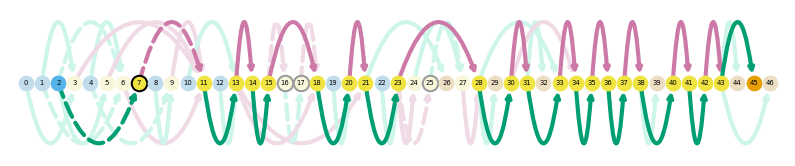

Saving transcript path graph for TALONT000169332 as figures/tfdp1_novel_TALONT000169332_path.png


In [128]:
sg.plot_transcript_path('TALONT000169332', indicate_novel=True, prefix='figures/tfdp1')

In [85]:
sg.gen_report('Tfdp1',
              'figures/tfdp1',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)


Plotting transcripts for ENSMUSG00000038482.11
Saving transcript path graph for TALONT000168710 as figures/tfdp1_browser_TALONT000168710_path.png
Saving transcript path graph for ENSMUST00000209885.1 as figures/tfdp1_browser_ENSMUST00000209885.1_path.png
Saving transcript path graph for ENSMUST00000170909.1 as figures/tfdp1_browser_ENSMUST00000170909.1_path.png
Saving transcript path graph for TALONT000168713 as figures/tfdp1_browser_TALONT000168713_path.png
Saving transcript path graph for TALONT000169332 as figures/tfdp1_browser_TALONT000169332_path.png
Saving transcript path graph for ENSMUST00000209396.1 as figures/tfdp1_browser_ENSMUST00000209396.1_path.png
Saving transcript path graph for TALONT000169373 as figures/tfdp1_browser_TALONT000169373_path.png
Saving transcript path graph for TALONT000169353 as figures/tfdp1_browser_TALONT000169353_path.png
Saving transcript path graph for TALONT000169095 as figures/tfdp1_browser_TALONT000169095_path.png
Saving transcript path graph fo

In [88]:
sg.gen_report('Tfdp1',
              'figures/tfdp1',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000038482.11
Saving transcript path graph for TALONT000168710 as figures/tfdp1_novel_TALONT000168710_path.png
Saving transcript path graph for ENSMUST00000209885.1 as figures/tfdp1_novel_ENSMUST00000209885.1_path.png
Saving transcript path graph for ENSMUST00000170909.1 as figures/tfdp1_novel_ENSMUST00000170909.1_path.png
Saving transcript path graph for TALONT000168713 as figures/tfdp1_novel_TALONT000168713_path.png
Saving transcript path graph for TALONT000169332 as figures/tfdp1_novel_TALONT000169332_path.png
Saving transcript path graph for ENSMUST00000209396.1 as figures/tfdp1_novel_ENSMUST00000209396.1_path.png
Saving transcript path graph for TALONT000169373 as figures/tfdp1_novel_TALONT000169373_path.png
Saving transcript path graph for TALONT000169353 as figures/tfdp1_novel_TALONT000169353_path.png
Saving transcript path graph for TALONT000169095 as figures/tfdp1_novel_TALONT000169095_path.png
Saving transcript path graph for TALONT000169529 

### What genes exhibit TSS switching between myoblasts and myotubes?

Just the same as the isoform switching genes, we can also query for transcription start site (TSS) switching genes. These can also be visualized with Swan, or Scanpy as the presentation demonstrated.

In [140]:
import scanpy as sc # we'll use scanpy to make a few plots here as well

tss_genes = sg.get_die_genes(kind='tss', obs_col=obs_col,
                        obs_conditions=obs_conditions,
                        p=0.05, dpi=10)
tss_genes = tss_genes.merge(sg.t_df[['gid', 'gname']].drop_duplicates(), on='gid', how='left')
tss_genes.sort_values(by='dpi', ascending=False)

,gid,p_val,dpi,adj_p_val,gname
277,ENSMUSG00000026414.13,0.000000e+00,98.952271,0.000000e+00,Tnnt2
139,ENSMUSG00000020439.17,2.103395e-137,97.718636,4.216753e-135,Smtn
495,ENSMUSG00000036918.16,4.249157e-10,95.652176,3.808244e-09,Ttc7
445,ENSMUSG00000033060.15,3.750830e-50,95.027420,1.930664e-48,Lmo7
735,ENSMUSG00000116358.1,9.559514e-13,95.000000,1.080480e-11,Gm49450
...,...,...,...,...,...
326,ENSMUSG00000028484.16,1.404916e-02,10.000000,4.281059e-02,Psip1
93,ENSMUSG00000015880.13,1.573873e-11,10.000000,1.602910e-10,Ncapg
87,ENSMUSG00000015053.14,3.748807e-04,10.000000,1.654601e-03,Gata2
428,ENSMUSG00000032228.16,2.812052e-03,10.000000,1.028925e-02,Tcf12


In [141]:
sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000026414.13
Saving transcript path graph for TALONT000394811 as figures/tnnt2_novel_TALONT000394811_path.png
Saving transcript path graph for TALONT000394812 as figures/tnnt2_novel_TALONT000394812_path.png
Saving transcript path graph for TALONT000396016 as figures/tnnt2_novel_TALONT000396016_path.png
Saving transcript path graph for TALONT000396098 as figures/tnnt2_novel_TALONT000396098_path.png
Saving transcript path graph for TALONT000394818 as figures/tnnt2_novel_TALONT000394818_path.png
Saving transcript path graph for TALONT000394815 as figures/tnnt2_novel_TALONT000394815_path.png
Saving transcript path graph for TALONT000394848 as figures/tnnt2_novel_TALONT000394848_path.png
Saving transcript path graph for TALONT000394894 as figures/tnnt2_novel_TALONT000394894_path.png
Saving transcript path graph for ENSMUST00000191055.1 as figures/tnnt2_novel_ENSMUST00000191055.1_path.png
Saving transcript path graph for TALONT000394893 as figures/tnnt2_nov

In [142]:
sg.gen_report('Tnnt2',
              'figures/tnnt2',
              metadata_cols=['time_point'],
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)


Plotting transcripts for ENSMUSG00000026414.13
Saving transcript path graph for TALONT000394811 as figures/tnnt2_browser_TALONT000394811_path.png
Saving transcript path graph for TALONT000394812 as figures/tnnt2_browser_TALONT000394812_path.png
Saving transcript path graph for TALONT000396016 as figures/tnnt2_browser_TALONT000396016_path.png
Saving transcript path graph for TALONT000396098 as figures/tnnt2_browser_TALONT000396098_path.png
Saving transcript path graph for TALONT000394818 as figures/tnnt2_browser_TALONT000394818_path.png
Saving transcript path graph for TALONT000394815 as figures/tnnt2_browser_TALONT000394815_path.png
Saving transcript path graph for TALONT000394848 as figures/tnnt2_browser_TALONT000394848_path.png
Saving transcript path graph for TALONT000394894 as figures/tnnt2_browser_TALONT000394894_path.png
Saving transcript path graph for ENSMUST00000191055.1 as figures/tnnt2_browser_ENSMUST00000191055.1_path.png
Saving transcript path graph for TALONT000394893 as

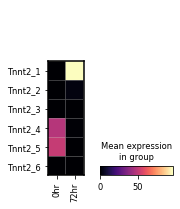

In [26]:
var_names = sg.tss_adata.var.loc[sg.tss_adata.var.gname == 'Tnnt2', 'tss_name'].tolist()
sc.pl.matrixplot(sg.tss_adata, var_names,
                 gene_symbols='tss_name',
                 groupby='time_point', layer='pi',
                 cmap='magma', swap_axes=True)

### What genes exhibit TES switching between myoblasts and myotubes?

And we'll do the same thing with TES switching genes.

In [22]:
tes_genes = sg.get_die_genes(kind='tes', obs_col=obs_col,
                        obs_conditions=obs_conditions,
                        p=0.05, dpi=10)
tes_genes = tes_genes.merge(sg.t_df[['gid', 'gname']].drop_duplicates(), on='gid', how='left')
tes_genes.sort_values(by='dpi', ascending=False)

,gid,p_val,dpi,adj_p_val,gname
770,ENSMUSG00000036779.12,2.430124e-12,95.348839,3.122969e-11,Tent4b
703,ENSMUSG00000033060.15,2.111947e-47,95.027420,1.007065e-45,Lmo7
243,ENSMUSG00000021451.16,1.294532e-09,93.023262,1.291207e-08,Sema4d
429,ENSMUSG00000026253.14,4.529658e-159,92.235542,9.470469e-157,Chrng
681,ENSMUSG00000032366.15,0.000000e+00,90.557555,0.000000e+00,Tpm1
...,...,...,...,...,...
133,ENSMUSG00000015880.13,1.573873e-11,10.000000,1.913043e-10,Ncapg
404,ENSMUSG00000025792.9,9.733678e-22,10.000000,2.232585e-20,Slc25a10
308,ENSMUSG00000023032.12,5.326164e-03,10.000000,1.966918e-02,Slc4a8
122,ENSMUSG00000015053.14,3.748807e-04,10.000000,1.830953e-03,Gata2


In [147]:
sg.gen_report('Tpm1',
              'figures/tpm1',
              metadata_cols=['time_point'],
              groupby='time_point', 
              cmap='viridis',
              transcript_name=True,
              novelty=True,
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000032366.15
Saving transcript path graph for ENSMUST00000113707.8 as figures/tpm1_novel_ENSMUST00000113707.8_path.png
Saving transcript path graph for ENSMUST00000113685.9 as figures/tpm1_novel_ENSMUST00000113685.9_path.png
Saving transcript path graph for ENSMUST00000113695.7 as figures/tpm1_novel_ENSMUST00000113695.7_path.png
Saving transcript path graph for ENSMUST00000113697.7 as figures/tpm1_novel_ENSMUST00000113697.7_path.png
Saving transcript path graph for TALONT000543286 as figures/tpm1_novel_TALONT000543286_path.png
Saving transcript path graph for ENSMUST00000131279.1 as figures/tpm1_novel_ENSMUST00000131279.1_path.png
Saving transcript path graph for ENSMUST00000030185.4 as figures/tpm1_novel_ENSMUST00000030185.4_path.png
Saving transcript path graph for TALONT000543297 as figures/tpm1_novel_TALONT000543297_path.png
Saving transcript path graph for TALONT000543293 as figures/tpm1_novel_TALONT000543293_path.png
Saving transcript path graph

In [148]:
sg.gen_report('Tpm1',
              'figures/tpm1',
              metadata_cols=['time_point'],
              groupby='time_point', 
              cmap='magma',
              transcript_name=True,
              novelty=True, 
              layer='pi', 
              browser=True,
              display_numbers=True)


Plotting transcripts for ENSMUSG00000032366.15
Saving transcript path graph for ENSMUST00000113707.8 as figures/tpm1_browser_ENSMUST00000113707.8_path.png
Saving transcript path graph for ENSMUST00000113685.9 as figures/tpm1_browser_ENSMUST00000113685.9_path.png
Saving transcript path graph for ENSMUST00000113695.7 as figures/tpm1_browser_ENSMUST00000113695.7_path.png
Saving transcript path graph for ENSMUST00000113697.7 as figures/tpm1_browser_ENSMUST00000113697.7_path.png
Saving transcript path graph for TALONT000543286 as figures/tpm1_browser_TALONT000543286_path.png
Saving transcript path graph for ENSMUST00000131279.1 as figures/tpm1_browser_ENSMUST00000131279.1_path.png
Saving transcript path graph for ENSMUST00000030185.4 as figures/tpm1_browser_ENSMUST00000030185.4_path.png
Saving transcript path graph for TALONT000543297 as figures/tpm1_browser_TALONT000543297_path.png
Saving transcript path graph for TALONT000543293 as figures/tpm1_browser_TALONT000543293_path.png
Saving tra

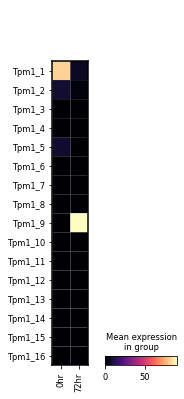

In [27]:
var_names = sg.tes_adata.var.loc[sg.tes_adata.var.gname == 'Tpm1', 'tes_name'].tolist()
sc.pl.matrixplot(sg.tes_adata, var_names,
                 gene_symbols='tes_name',
                 groupby='time_point', layer='pi',
                 cmap='magma', swap_axes=True)